# Task 1
## Task 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 64
r = 0.5
K = [1, 4, 8, 16]

In [3]:
def generate_coefficients(K):
    return np.random.normal(0.0, 1.0, size=(K, K))

def f_u(x, y, a_ij, r):
    """
    Compute f(x,y) and u(x,y) for given coefficients a_ij.
    """
    K = a_ij.shape[0]

    i = np.arange(1, K+1)
    j = np.arange(1, K+1)
    ii, jj = np.meshgrid(i, j, indexing="ij")

    sin_ix = np.sin(np.pi * ii * x)
    sin_jy = np.sin(np.pi * jj * y)

    basis = sin_ix * sin_jy
    freq = ii**2 + jj**2

    f_val = (np.pi / K**2) * np.sum(
        a_ij * freq**r * basis
    )

    u_val = (1.0 / (np.pi * K**2)) * np.sum(
        a_ij * freq**(r-1) * basis
    )

    return f_val, u_val

def generate_sample(K, N=64, r=0.5):
    a_ij = generate_coefficients(K)

    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    X, Y = np.meshgrid(x, y, indexing="ij")

    f = np.zeros_like(X)
    u = np.zeros_like(X)

    for i in range(N):
        for j in range(N):
            f[i, j], u[i, j] = f_u(X[i,j], Y[i,j], a_ij, r)

    return f, u



/var/folders/cq/6lv3lnyd7l340pjp1d_14xj80000gn/T/ipykernel_7300/3354819986.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


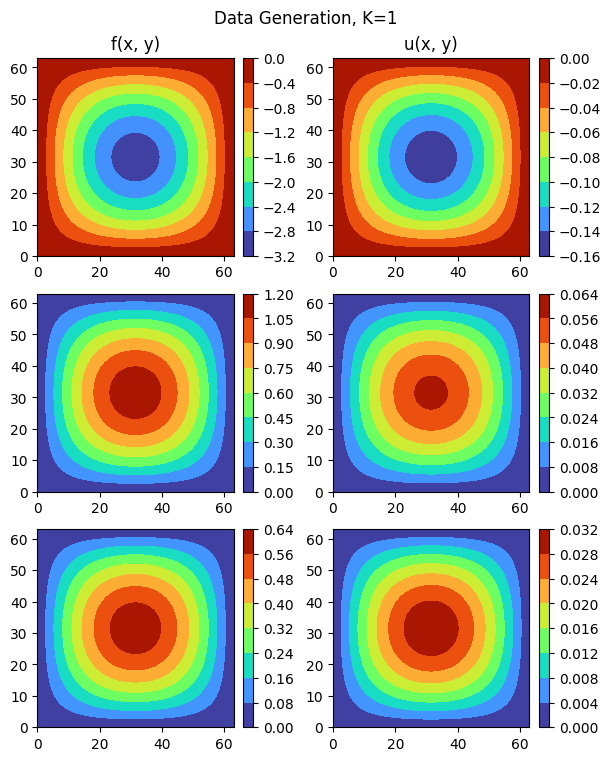

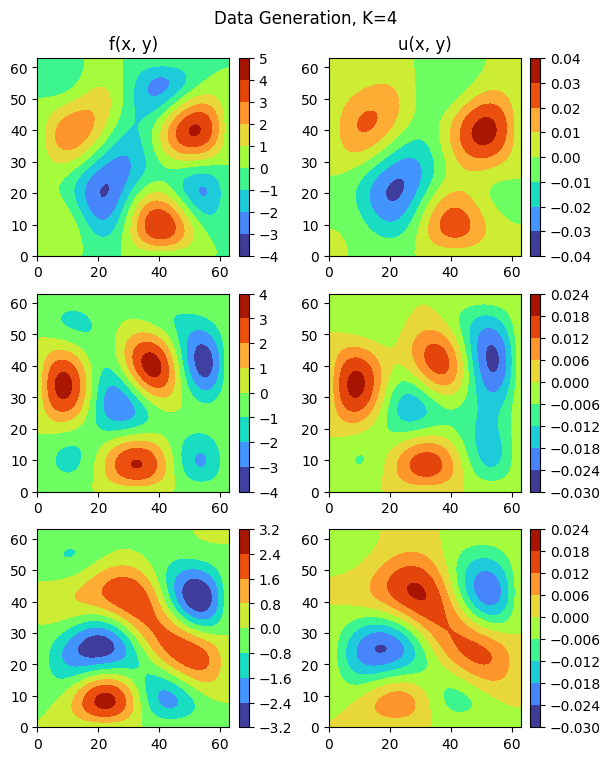

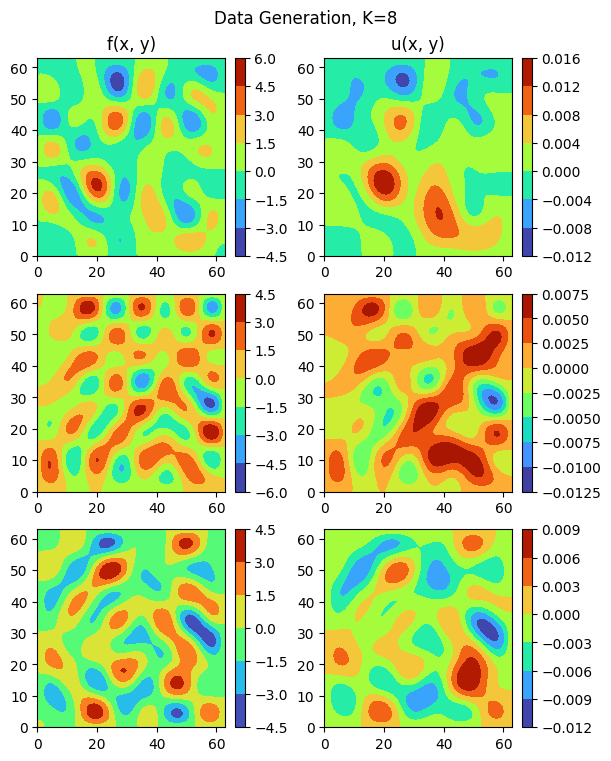

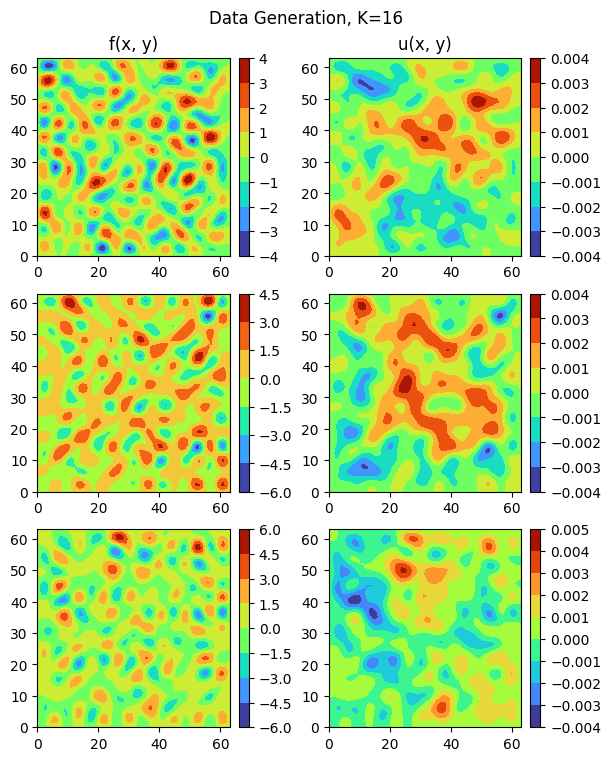

In [4]:
for i in K:
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(3*2, 2.5*3), layout="constrained")

    ax[0, 0].set_title("f(x, y)")
    ax[0, 1].set_title("u(x, y)")
    
    for j in range(3):
        f, g = generate_sample(i)
        cf0 = ax[j, 0].contourf(f, cmap="turbo")
        cf1 = ax[j, 1].contourf(g, cmap="turbo")
        fig.colorbar(cf0, ax=ax[j, 0])
        fig.colorbar(cf1, ax=ax[j, 1])
        fig.suptitle('Data Generation, K=' + str(i))
        fig.show()

## Task 1.2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.activation = nn.ReLU()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 10)
        self.fc5 = nn.Linear(10, 2)


    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.fc5(x)
        return x
    
    def get_loss_function(self):


    def get_optimizer(optimizer_name, model):
        if optimizer_name == "ADAM":
            return optim.Adam(model.parameters())
        elif optimizer_name == "LBFGS":
            return optim.LBFGS(model.parameters())
        raise ValueError('Chosen optimizer is unavailable.')
    
    def train(model, optimizer, criterion, inputs, targets):
        def closure():
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            return loss

        optimizer.step(closure)
        return closure().item()


    def evaluate(model, x_test):
        model.eval()
        with torch.no_grad():
            y_pred = model(x_test.view(-1, 1)).numpy()
        return y_pred
            

In [ ]:
model = MLP()